In [1]:
import PIL.Image as Image
import torchvision
from torchvision import transforms
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
dpi = matplotlib.rcParams['figure.dpi']

def plt_show_img(img):
    img = np.array(img)
    height, width, depth = img.shape
    figsize = width / float(dpi), height / float(dpi)
    plt.figure(figsize=figsize)
    plt.imshow(img)
    plt.show()

(605, 806)


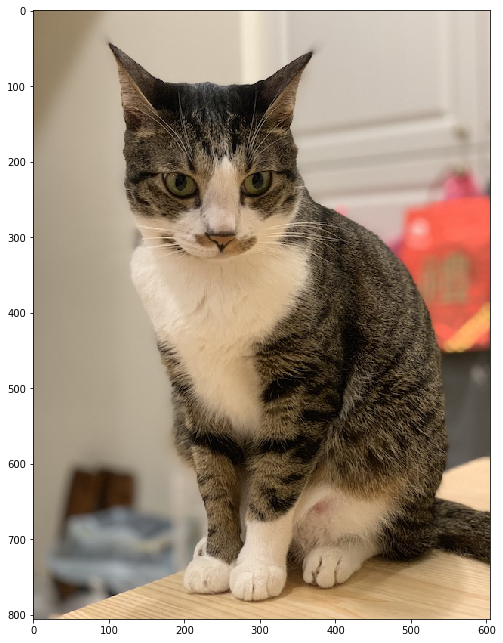

In [3]:
file_name='./assets/cv_data_2.png'

# read image with PIL module
pil_img = Image.open(file_name, mode='r')
pil_img = pil_img.convert('RGB')
print(pil_img.size)
plt_show_img(pil_img)

In [4]:
np_img = np.array(pil_img)  # convert將PIL image to "numpy.ndarray" 
print(type(np_img))
np_img = np.asarray(pil_img)
print(type(np_img))

pil_img_ = transforms.ToPILImage(np_img)  # convert "pytoch.tensor" or "numpy.ndarray" to PIL Image
print(type(pil_img_))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'torchvision.transforms.transforms.ToPILImage'>


## Crop

(300, 300)


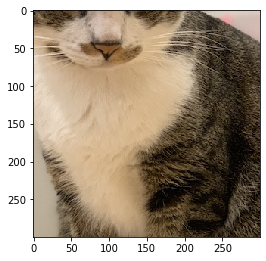

In [5]:
# Crop
size = 300
transform = transforms.Compose([
    transforms.CenterCrop(size),
])
pil_img_ = transform(pil_img)
print(pil_img_.size)
plt_show_img(pil_img_)

(300, 300)


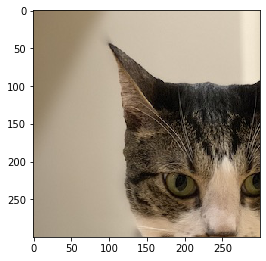

(300, 300)


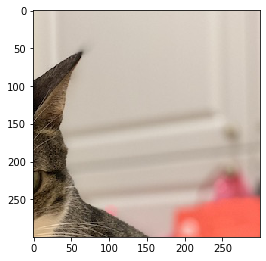

(300, 300)


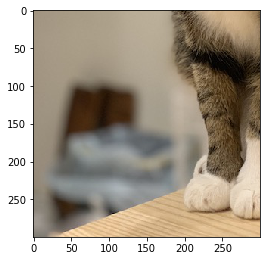

(300, 300)


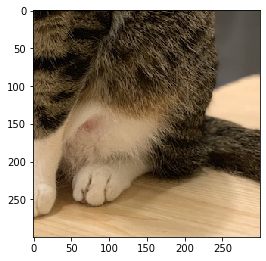

(300, 300)


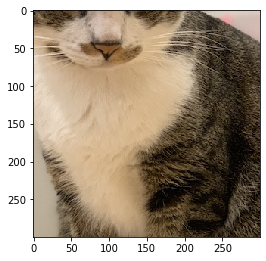

In [6]:
transform = transforms.Compose([
    transforms.FiveCrop(size),
])
pil_img_ = transform(pil_img)

for p_img in pil_img_:
    print(p_img.size)
    plt_show_img(p_img)

## Flip

(150, 220)


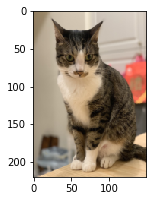

In [7]:
import torch
transform = transforms.Compose([
    transforms.Resize((220, 150)),
    transforms.RandomHorizontalFlip(p=0.5),
])

pil_img_ = transform(pil_img)
print(pil_img_.size)
plt_show_img(pil_img_)

## Padding

(230, 300)


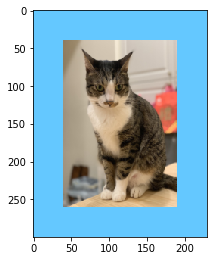

In [8]:
padding = 40
transform = transforms.Compose([
    transforms.Resize((220, 150)),
    transforms.Pad(padding, fill=(100,200,255), padding_mode="constant"), 
])
pil_img_ = transform(pil_img)
print(pil_img_.size)
plt_show_img(pil_img_)

(290, 360)


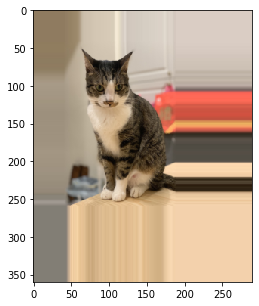

In [9]:
padding = (40, 40, 100, 100)
transform = transforms.Compose([
    transforms.Resize((220, 150)),
    transforms.Pad(padding, padding_mode="edge"), 
])
pil_img_ = transform(pil_img)
print(pil_img_.size)
plt_show_img(pil_img_)

(290, 360)


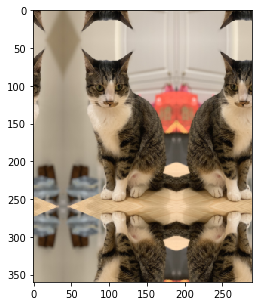

In [10]:
padding = (40, 40, 100, 100)
transform = transforms.Compose([
    transforms.Resize((220, 150)),
    transforms.Pad(padding, padding_mode="symmetric"), 
])
pil_img_ = transform(pil_img)
print(pil_img_.size)
plt_show_img(pil_img_)

## Affine

(150, 220)


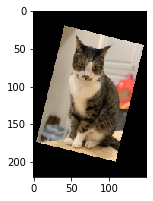

In [11]:
transform = transforms.Compose([
    transforms.Resize((220, 150)),
    transforms.RandomAffine(
        degrees=(-30,30),
        scale=(0.7, 0.8),
    )
])

pil_img_ = transform(pil_img)
print(pil_img_.size)
plt_show_img(pil_img_)

## Practice

(180, 250)


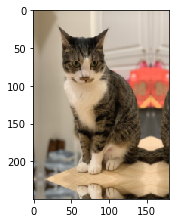

In [16]:
# 1. Load image
pil_img = pil_img

# 2. Define a transform with following operations
# a) Resize to (250, 180)
# b) Randomly choose one of transform, "padding" or "affine" to apply (hint: transforms.RandomChoice)
# 3. Randomly apply the transform to loaded image in random order(hint: transforms.RandomApply, transforms.RandomOrder)
padding_tsf = transforms.Pad(padding, padding_mode="symmetric")
affine_tsf = transforms.RandomAffine(
    degrees=(-10,10),
    scale=(0.7, 0.8),
)

rand_choise = transforms.RandomChoice([padding_tsf, affine_tsf])
rand_order = transforms.RandomOrder(
    [
        transforms.Resize((250, 180)),
        rand_choise,
    ]
)
transform = transforms.RandomApply([rand_order])

pil_img_ = transform(pil_img)
print(pil_img_.size)
plt_show_img(pil_img_)